In [1]:
import numpy as np
import matplotlib.pyplot as plt

#### Declare Parameters 

In [2]:
n_in = 1 #dimension of x
n_out = 1 #dimension of y
n_data = 4 #number of datapoints
n_data_reprod = 100 #number of datapoints in a reproduction
n_reprod = 20 #number of randomly sampled reproductions
params = np.array([1., 0.1, 0.001]) #GPR parameters (here defined for squared exponential kernels and noisy observations)

#### Generate Data 

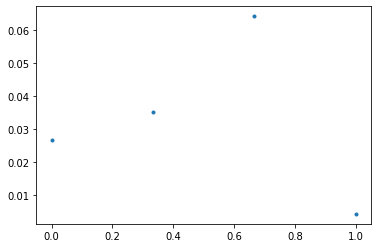

In [3]:
x = np.linspace(0,1,n_data)
y = np.random.rand(n_data)*0.1
data = np.vstack([x,y]).T
plt.plot(x,y,'.')

In [7]:
from numpy.linalg import norm

In [8]:
def RBF_cov_function(x1,x2,params):
    return params[0] * np.exp(-(norm(x1-x2)**2)/params[1])

def new_cov_function(x1,x2,params):
    #define here the codes for the new covariance function
    pass
    return

def compute_cov_matrix(X1,X2,params, cov_func = RBF_cov_function):
    #You can define other covariance function to replace RBF_cov_function
    n_row = len(X1)
    n_col = len(X2)
    K = np.zeros((n_row, n_col))
    for i in range(n_row):
        for j in range(n_col):
            K[i,j] = cov_func(X1[i], X2[j], params)
            
    return K

In [9]:
K = compute_cov_matrix(x,x,params)

In [10]:
K_inv = np.linalg.pinv(K + params[2]*np.eye(K.shape[0]))

In [11]:
xs = np.linspace(0,1,n_data_reprod)
Ks = compute_cov_matrix(xs,x,params)

#### Mean computation 

In [12]:
ys = np.dot(Ks, np.dot(K_inv,y))

#### Uncertainty evaluation 

In [15]:
Kss = compute_cov_matrix(xs,xs,params)
S = Kss - np.dot(Ks, np.dot(K_inv, Ks.T))

In [16]:
from scipy.stats import multivariate_normal as mvn

#### Plot Posterior Samples 

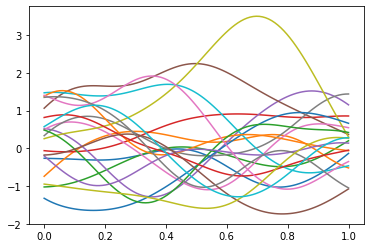

In [17]:
prior_traj_dist = mvn(mean = np.zeros(n_data_reprod), cov=Kss, allow_singular=True)

prior_samples = prior_traj_dist.rvs(size=n_reprod)

for ys_i in prior_samples:
    plt.plot(xs, ys_i)
#plt.plot(x,y,'.',markersize=30)

#### Plot Posterior Samples 

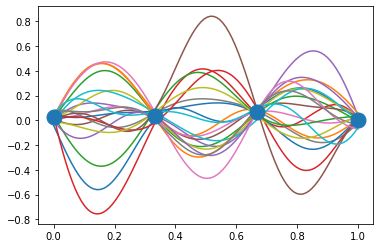

In [19]:
post_traj_dist = mvn(mean = ys, cov=S, allow_singular=True)

post_samples = post_traj_dist.rvs(size=n_reprod)

for ys_i in post_samples:
    plt.plot(xs, ys_i)
plt.plot(x,y,'.',markersize=30)

#### Plot trajectory distributions 

In [20]:
sigmas = np.diagonal(S)

from utils import *
%load_ext autoreload
%autoreload 2

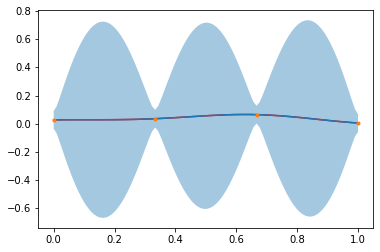

In [21]:
fig,ax = plt.subplots()
plot_with_covs_1D(xs,ys,sigmas,ax)
plt.plot(xs,ys,'-')
plt.plot(x,y,'.')